

# Project: Analysing the World of Hollywood

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

<p style="font-size:17px;">Hello! I will be working on TMDB dataset which contains detail about 10000+ hollywood movies.I will analyyse this dataset and answer the questions such as <b>what features/properties majorly influence the success of a film (revenue) and  Which genres are most popular from year to year?</b>
<p style="font-size:17px;"> Okay so I will be gathering the data from csv, assesing it and cleaning it and then will do the EDA.After that I will try to answer the relevant questions.

In [1]:
#importing the packages
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


## Questions to be asked:


<ul>What features/properties majorly influence the success of a film (revenue) ?</ul>
<ul>Which genres are most popular from year to year?</ul>

<a id='wrangling'></a>
## Data Wrangling



### General Properties

### Gathering of Data

In [2]:
df=pd.read_csv("tmdb.csv")

### Assessing the Data

In [3]:
df.tail(4)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [4]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [5]:
df.describe()


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [7]:
sum(df.duplicated())

1

<h2 style="text-align:center;color:red;">Some observations</h3>

> * There are missing values in columns like homepage,tagline,keywords,production companies
> * There is one duplicate row
> * Some columns are not useful for our analysis like homepage,tagline etc.Even the budget and revenue is not useful as we have the adjusted budget and revenue
> * From the df.describe() table we get to know more than 50% of budget is 0.It is safe to assume these are the missing values.
> * There are 2 unique identifiers id and imdb_id we can remove one of them as for our analysis we dont need to uniquely identify movie.We might need it later
>* The datatype of release date is an object, datatype of adjusted revenue,budget revenue is of float type and budget,revenue is of int type 




### Data Cleaning

Tasks-
> * I will drop the duplicates using df.drop_duplicate
> * I will drop few columns which arent useful for us
> * I will replace the budget_adj and revenue_adj 0's to NAN for better clarity
> * I will change budget_adj and revenue_adj to float and release_data to date_time format
> * I will remove the rows which have missing genre values as we need genre.
> * I will also make genres into a list by using python split function("|")


#### Dropping the duplicates

In [8]:
#First dropping the duplicate
df.drop_duplicates(inplace=True)

#### Dropping the columns which arent useful for our analysis

In [9]:
# These are some the columns that wont be useful for our analysis
df.drop(['imdb_id','tagline','homepage','overview','budget','revenue','keywords'],axis=1, inplace=True)


#### Replacing the budget_adj and revenue_adj 0's with NAN 



In [10]:
df['budget_adj']=df['budget_adj'].replace({0: None})
df['revenue_adj']=df['revenue_adj'].replace({0: None})

#### Fixing the datatypes of budget_adj,revenue_adj and relaease date

In [11]:
df['budget_adj']=df['budget_adj'].astype(float)
df['revenue_adj']=df['revenue_adj'].astype(float)
df['release_date']=pd.to_datetime(df['release_date'])

### Now having a look

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              5169 non-null float64
revenue_adj             4849 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(4), object(5)
memory usage: 1.2+ MB


In [13]:
df.head(3)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08


#### As genre will be important for us we have to remove the missing genres from our observation

In [14]:
genre_missing=df[df['genres'].isnull()]

In [15]:
genre_missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 424 to 10659
Data columns (total 14 columns):
id                      23 non-null int64
popularity              23 non-null float64
original_title          23 non-null object
cast                    22 non-null object
director                21 non-null object
runtime                 23 non-null int64
genres                  0 non-null object
production_companies    9 non-null object
release_date            23 non-null datetime64[ns]
vote_count              23 non-null int64
vote_average            23 non-null float64
release_year            23 non-null int64
budget_adj              1 non-null float64
revenue_adj             0 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(4), object(5)
memory usage: 2.7+ KB


In [16]:
#dropping it from our main dataset
df.drop(genre_missing.index,inplace=True)


In [17]:
# converting the genres into list
df['genres']=df['genres'].apply(lambda x:list(x.split('|')))
df.head(3)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,"[Adventure, Science Fiction, Thriller]",Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08


I have cleaned it as much as possible.Now its time for some EDA and observe the data via stats and visualisations.Maybe there will be some further cleaning required which will be done further alongside.

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Which genres are most popular from year to year?

To answer this question we only need the folllowing columns from our datasets:
* id (as a unique identifier)
* genre
* year 
* popularity

In [18]:
#Using the columns we require for this question
genre=df[['id','release_year','genres','popularity']]
genre.head()

,id,release_year,genres,popularity
0,135397,2015,"[Action, Adventure, Science Fiction, Thriller]",32.985763
1,76341,2015,"[Action, Adventure, Science Fiction, Thriller]",28.419936
2,262500,2015,"[Adventure, Science Fiction, Thriller]",13.112507
3,140607,2015,"[Action, Adventure, Science Fiction, Fantasy]",11.173104
4,168259,2015,"[Action, Crime, Thriller]",9.335014


Now as we can see we have a list of genre in each row we have to make new row for each genre

In [19]:
genre=genre.genres.apply(pd.Series).merge(genre, right_index = True, left_index = True).drop(["genres"], axis = 1).melt(id_vars = ['id','release_year','popularity'], value_name = "genres").drop("variable", axis = 1).dropna()

genre.head()

,id,release_year,popularity,genres
0,135397,2015,32.985763,Action
1,76341,2015,28.419936,Action
2,262500,2015,13.112507,Adventure
3,140607,2015,11.173104,Action
4,168259,2015,9.335014,Action


In [20]:
genre.groupby(['release_year','genres'])['popularity'].sum()

release_year  genres         
1960          Action               4.725796
              Adventure            3.504904
              Comedy               3.168003
              Crime                0.692959
              Drama                7.361967
              Family               0.834191
              Fantasy              0.856495
              Foreign              0.194948
              History              2.061821
              Horror               4.140147
              Music                0.423531
              Romance              3.247365
              Science Fiction      0.983714
              Thriller             4.871460
              War                  0.451727
              Western              3.406554
1961          Action               2.561389
              Adventure            4.603938
              Animation            2.631987
              Comedy               6.798382
              Crime                1.613038
              Drama                6.915731
  

In [21]:
temp=genre.groupby(['release_year','genres'])['popularity'].sum()
temp=temp.groupby(['release_year']).nlargest(1)
temp
a=pd.DataFrame(data=temp)
a

,,,popularity
release_year,release_year,genres,
1960,1960,Drama,7.361967
1961,1961,Drama,6.915731
1962,1962,Drama,8.232008
1963,1963,Thriller,7.199292
1964,1964,Comedy,7.859657
1965,1965,Drama,6.105756
1966,1966,Drama,5.436264
1967,1967,Drama,8.183477
1968,1968,Drama,7.546450


>Above is the year by year breakdown of the most popular genre.It seems that Drama movie has always been most popular in many years followed by comedy movies
<br>
>In the 2000's drama have dominated completely where as in 1980's was a bit of mixed between action,drama,comedy

### Which features contributre to success of movie?

Now in this analysis we need budget and revenue so naturally we have to remove the records which dont have budget and revenue as we cant fill the missing values...<br>
<b>After searching the internet I found out a movie is considered successful if the the revenue of a film is 3 times that of the budget atleast.<b>

In [22]:
movies=df[(df['budget_adj'].isnull()==False)&(df['revenue_adj'].isnull()==False)]


In [23]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 14 columns):
id                      3854 non-null int64
popularity              3854 non-null float64
original_title          3854 non-null object
cast                    3850 non-null object
director                3853 non-null object
runtime                 3854 non-null int64
genres                  3854 non-null object
production_companies    3808 non-null object
release_date            3854 non-null datetime64[ns]
vote_count              3854 non-null int64
vote_average            3854 non-null float64
release_year            3854 non-null int64
budget_adj              3854 non-null float64
revenue_adj             3854 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(4), object(5)
memory usage: 451.6+ KB


>Now we will add a column called profit which is basically revenue_adj-budget_adj

In [24]:
movies['profit']=movies['revenue_adj']-movies['budget_adj']

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
movies.head(1)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1392.445893,1254.445953


> As we are observing the profit ,budget,revenue numbers are a bit difficult to understand as they aere very high values.So we will connvert them into million by dividing by 1000000

In [27]:
movies['revenue_adj']=movies['revenue_adj']/1000000
movies['profit']=movies['profit']/1000000

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [47]:
movies['budget_adj']=movies['budget_adj']/1000000


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [48]:
movies.head()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137.999939,1392.445893,1254.445953
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137.999939,348.161292,210.161353
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,"[Adventure, Science Fiction, Thriller]",Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,101.199955,271.619025,170.419070
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,"[Action, Adventure, Science Fiction, Fantasy]",Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,183.999919,1902.723130,1718.723211
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,"[Action, Crime, Thriller]",Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,174.799923,1385.748801,1210.948878


In [58]:
movies.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
count,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3854.000000,3854.000000
mean,39888.185262,1.191554,109.220291,527.720291,6.168163,2001.261028,4.423999e+01,137.064690,92.824697
std,67222.527399,1.475162,19.922820,879.956821,0.794920,11.282575,4.480925e+01,216.111351,194.071460
min,5.000000,0.001117,15.000000,10.000000,2.200000,1960.000000,9.693980e-07,0.000002,-413.912431
25%,6073.500000,0.462368,95.000000,71.000000,5.700000,1995.000000,1.309053e+01,18.357350,-1.504995
50%,11321.500000,0.797511,106.000000,204.000000,6.200000,2004.000000,3.001611e+01,61.730679,27.370641
75%,38573.250000,1.368324,119.000000,580.000000,6.700000,2010.000000,6.061307e+01,163.257655,107.454751
max,417859.000000,32.985763,338.000000,9767.000000,8.400000,2015.000000,4.250000e+02,2827.123750,2750.136651


In [52]:
success=movies[movies['profit']/movies['budget_adj']>3]

In [54]:
success.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1026 entries, 0 to 10828
Data columns (total 15 columns):
id                      1026 non-null int64
popularity              1026 non-null float64
original_title          1026 non-null object
cast                    1025 non-null object
director                1026 non-null object
runtime                 1026 non-null int64
genres                  1026 non-null object
production_companies    1019 non-null object
release_date            1026 non-null datetime64[ns]
vote_count              1026 non-null int64
vote_average            1026 non-null float64
release_year            1026 non-null int64
budget_adj              1026 non-null float64
revenue_adj             1026 non-null float64
profit                  1026 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(4), object(5)
memory usage: 128.2+ KB


<b>Now after making the dataset we are ready to some analysis.We will be checking success with each of the factors like runtime,score,popularity etc. and we will also see various visualisations.</b>

Text(0.5,1,'Successful Fims')

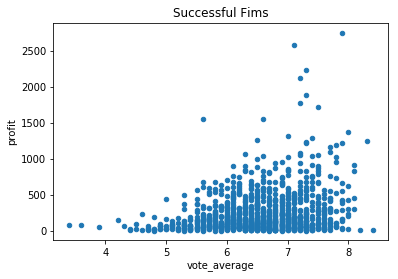

In [55]:
success.plot(x='vote_average',y='profit',kind='scatter',);
plt.title("Successful Fims")

#### What is the movie runtime of successful movies?

In [65]:
success['runtime'].mean()


109.52046783625731

In [67]:
success['runtime'].mode()

0    93
dtype: int64

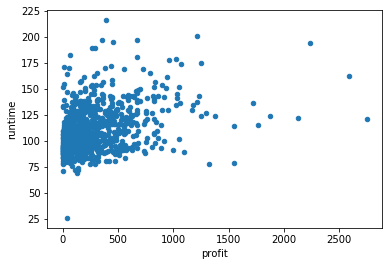

In [71]:
success.plot(kind='scatter',x='profit',y='runtime');


As we can see the most common occuring runtime is 93 minutes and the average runtime is 109 minutes.This means that movies generally shiudnt exceed 2 hrs and it shoould be around 1.5 hrs to 2 hrs

#### Breakdown of profit month by month

Text(0.5,1,'Profits vs Month of Release')

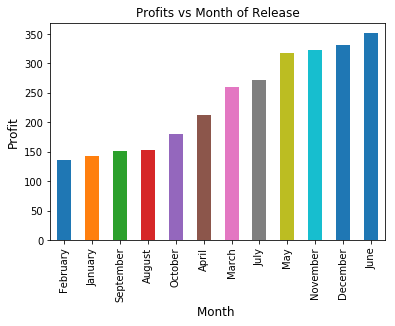

In [70]:
success.groupby(success['release_date'].dt.strftime('%B'))['profit'].mean().sort_values().plot(kind='bar');
plt.xlabel('Month ', fontsize=12)
plt.ylabel('Profit',fontsize=12)
plt.title('Profits vs Month of Release')

As we can observe from the graph thatNovember,December,January are the best months top release a movie.These months being a holiday season attract a large number of viewers as compared to the other months

#### Breakdown of profit year by year

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [15]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0